In [46]:
import pickle

In [47]:
ground_truth_y_file_name='Y_trainingAll.p'

In [48]:
ground_truth_y_file=pickle.load(open(ground_truth_y_file_name, "rb"))

In [49]:
ground_truth_x_file_name='X_trainingAll.p'

In [50]:
ground_truth_x_file=pickle.load(open(ground_truth_x_file_name, "rb"))

In [51]:
import numpy as np

features_list = [feature for feature in ground_truth_x_file]
targets_list = [feature for feature in ground_truth_y_file]
Numsamples = len(ground_truth_x_file[features_list[0]])
Numfeatures = len(ground_truth_x_file)
Numtargets = len(ground_truth_y_file)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = ground_truth_x_file[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = ground_truth_y_file[targets_list[j]][i][0]

ground_truth_x_file = x_data
ground_truth_y_file = y_data

In [52]:
ground_truth_y_file = ground_truth_y_file[:,~np.all(ground_truth_y_file == 0, axis=0)]

In [53]:
ground_truth_x_file.shape,ground_truth_y_file.shape

((86, 6), (86, 5))

In [54]:
#now, I need to select the data
print('the max emittance before cleaning data is',max(ground_truth_y_file[:,0]))
print('the min emittance before cleaning data is',min(ground_truth_y_file[:,0]))

the max emittance before cleaning data is 1.6689109037483907
the min emittance before cleaning data is 0.16479332865961996


In [55]:
max_allowed_emittance = 1

In [56]:
targets_list = new_targets_list

In [57]:
#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(ground_truth_y_file[:, features_index])
    std = np.std(ground_truth_y_file[:, features_index])
    
    for index in range(0, ground_truth_y_file.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if ground_truth_y_file[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    
    ground_truth_x_file = ground_truth_x_file[keep_index, :]
    ground_truth_y_file = ground_truth_y_file[keep_index, :]

In [58]:
ground_truth_x_file.shape,ground_truth_y_file.shape

((78, 6), (78, 5))

In [59]:
print('the max emittance before cleaning data is',max(ground_truth_y_file[:,0]))
print('the min emittance before cleaning data is',min(ground_truth_y_file[:,0]))

the max emittance before cleaning data is 0.9145046369611117
the min emittance before cleaning data is 0.16479332865961996


In [60]:
ml_x_file_name='gpt_run_based_on_ml_X_trainingAll.p'
ml_y_file_name='gpt_run_based_on_ml_Y_trainingAll.p'

In [61]:
ml_y_file=pickle.load(open(ml_y_file_name, "rb"))
ml_x_file=pickle.load(open(ml_x_file_name, "rb"))

In [62]:
import numpy as np

features_list = [feature for feature in ml_x_file]
targets_list = [feature for feature in ml_y_file]
Numsamples = len(ml_x_file[features_list[0]])
Numfeatures = len(ml_x_file)
Numtargets = len(ml_y_file)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = ml_x_file[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = ml_y_file[targets_list[j]][i][0]

ml_x_file = x_data
ml_y_file = y_data

In [63]:
ml_y_file = ml_y_file[:,~np.all(ml_y_file == 0, axis=0)]

In [64]:
ml_x_file.shape,ml_y_file.shape

((77, 6), (77, 5))

In [65]:
#now, I need to drop index 6 for the ground truth
#because this file is not reproduced due to subsequent gpt run

In [93]:
ground_truth_y_file = np.delete(ground_truth_y_file, (6), axis=0)

In [100]:
check_index=20

In [101]:
ground_truth_y_file[check_index,:]

array([  0.59473647, -12.78987659,  16.50616186,  -9.56045517,
        18.24930579])

In [102]:
ml_y_file[check_index,:]

array([ 1.72688026, -5.06436932,  9.8132517 , -9.17119569, 31.00399652])

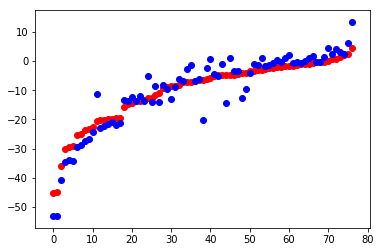

In [109]:
import matplotlib.pyplot as plt

x_axis=[]
for index in range(0,ground_truth_y_file.shape[0]):
    x_axis.append(index)

sort_index=np.argsort(ground_truth_y_file[:,1])
ground_truth_y_file=ground_truth_y_file[sort_index,:]
ml_y_file=ml_y_file[sort_index,:]
 

plt.scatter(x_axis,ground_truth_y_file[:,1],c='r')
plt.scatter(x_axis,ml_y_file[:,1],c='b')
plt.show()

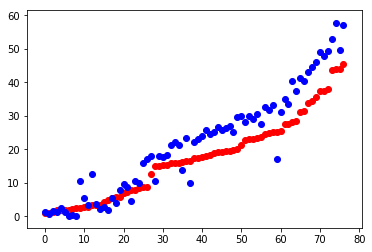

In [110]:
x_axis=[]
for index in range(0,ground_truth_y_file.shape[0]):
    x_axis.append(index)

sort_index=np.argsort(ground_truth_y_file[:,2])
ground_truth_y_file=ground_truth_y_file[sort_index,:]
ml_y_file=ml_y_file[sort_index,:]
 

plt.scatter(x_axis,ground_truth_y_file[:,2],c='r')
plt.scatter(x_axis,ml_y_file[:,2],c='b')
plt.show()

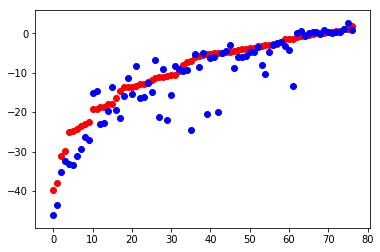

In [111]:
x_axis=[]
for index in range(0,ground_truth_y_file.shape[0]):
    x_axis.append(index)

sort_index=np.argsort(ground_truth_y_file[:,3])
ground_truth_y_file=ground_truth_y_file[sort_index,:]
ml_y_file=ml_y_file[sort_index,:]
 

plt.scatter(x_axis,ground_truth_y_file[:,3],c='r')
plt.scatter(x_axis,ml_y_file[:,3],c='b')
plt.show()

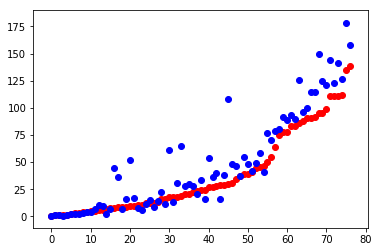

In [112]:
x_axis=[]
for index in range(0,ground_truth_y_file.shape[0]):
    x_axis.append(index)

sort_index=np.argsort(ground_truth_y_file[:,4])
ground_truth_y_file=ground_truth_y_file[sort_index,:]
ml_y_file=ml_y_file[sort_index,:]
 

plt.scatter(x_axis,ground_truth_y_file[:,4],c='r')
plt.scatter(x_axis,ml_y_file[:,4],c='b')
plt.show()